# Lab 2: ML Life Cycle: Data Understanding and Data Preparation

In [2]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In this lab, you will practice the second and third steps of the machine learning life cycle: data understanding and data preparation. You will beging preparing your data so that it can be used to train a machine learning model that solves a regression problem. Note that by the end of the lab, your data set won't be completely ready for the modeling phase, but you will gain experience using some common data preparation techniques. 

You will complete the following tasks to transform your data:

1. Build your data matrix and define your ML problem:
    * Load the Airbnb "listings" data set into a DataFrame and inspect the data
    * Define the label and convert the label's data type to one that is more suitable for modeling
    * Identify features
2. Clean your data:
    * Handle outliers by building a new regression label column by winsorizing outliers
    * Handle missing data by replacing all missing values in the dataset with means
3. Perform feature transformation using one-hot encoding
4. Explore your data:
    * Identify two features with the highest correlation with label
    * Build appropriate bivariate plots to visualize the correlations between features and the label
5. Analysis:
    * Analyze the relationship between the features and the label
    * Brainstorm what else needs to be done to fully prepare the data for modeling

## Part 1. Build Your Data Matrix (DataFrame) and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will be working with the Airbnb NYC "listings" data set. Use the specified path and name of the file to load the data. Save it as a Pandas DataFrame called `df`.

In [3]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "airbnbData.csv")

**Task**: Load the data and save it to DataFrame `df`.

<i>Note:</i> You may receive a warning message. Ignore this warning.

In [5]:
df = pd.read_csv(filename)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


####  Inspect the Data


<b>Task</b>: Display the shape of `df` -- that is, the number of rows and columns.

In [8]:
df.shape

(38277, 74)

<b>Task</b>: Display the column names.

In [9]:
print("Columns:", df.columns.tolist())

Columns: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabili

**Task**: Get a peek at the data by displaying the first few rows, as you usually do.

In [10]:
df.head(10)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,https://www.airbnb.com/rooms/5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.52
3,5136,https://www.airbnb.com/rooms/5136,20211204143024,2021-12-05,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,https://www.airbnb.com/rooms/5178,20211204143024,2021-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.42,4.87,4.36,NaN,f,1,0,1,0,3.68
5,5203,https://www.airbnb.com/rooms/5203,20211204143024,2021-12-05,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,https://www.airbnb.com/users/show/7490,...,4.95,4.94,4.92,NaN,f,1,0,1,0,0.87
6,5803,https://www.airbnb.com/rooms/5803,20211204143024,2021-12-05,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,https://a0.muscache.com/pictures/2884180/f19a1...,9744,https://www.airbnb.com/users/show/9744,...,4.82,4.87,4.73,NaN,f,3,1,2,0,1.48
7,6848,https://www.airbnb.com/rooms/6848,20211204143024,2021-12-05,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,https://www.airbnb.com/users/show/15991,...,4.80,4.67,4.57,NaN,t,1,1,0,0,1.24
8,6872,https://www.airbnb.com/rooms/6872,20211204143024,2021-12-05,Uptown Sanctuary w/ Private Bath (Month to Month),A charming month-to-month home away from home ...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,https://www.airbnb.com/users/show/16104,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
9,6990,https://www.airbnb.com/rooms/6990,20211204143024,2021-12-05,UES Beautiful Blue Room,Beautiful peaceful healthy home<br /><br /><b>...,"Location: Five minutes to Central Park, Museum...",https://a0.muscache.com/pictures/be6cd5b3-9295...,16800,https://www.airbnb.com/users/show/16800,...,4.95,4.84,4.84,NaN,t,1,0,1,0,1.82


#### Define the Label

Assume that your goal is to train a machine learning model that predicts the price of an Airbnb. This is an example of supervised learning and is a regression problem. In our dataset, our label will be the `price` column. Let's inspect the values in the `price` column.

In [11]:
df['price']

0        $150.00
1         $75.00
2         $60.00
3        $275.00
4         $68.00
          ...   
38272     $79.00
38273     $76.00
38274    $116.00
38275    $106.00
38276    $689.00
Name: price, Length: 38277, dtype: object

Notice the `price` column contains values that are listed as $<$currency_name$>$$<$numeric_value$>$. 
<br>For example, it contains values that look like this: `$120`. <br>

**Task**:  Obtain the data type of the values in this column:

In [12]:
df['price'].dtype

dtype('O')

Notice that the data type is "object," which in Pandas translates to the String data type.

**Task**:  Display the first 15 unique values of  the `price` column:

In [13]:
df['price'].unique()[:15]

array(['$150.00', '$75.00', '$60.00', '$275.00', '$68.00', '$98.00',
       '$89.00', '$65.00', '$62.00', '$90.00', '$199.00', '$96.00',
       '$299.00', '$140.00', '$175.00'], dtype=object)

In order for us to use the prices for modeling, we will have to transform the values in the `price` column from strings to floats. We will:

* remove the dollar signs (in this case, the platform forces the currency to be the USD, so we do not need to worry about targeting, say, the Japanese Yen sign, nor about converting the values into USD). 
* remove the commas from all values that are in the thousands or above: for example, `$2,500`. 

The code cell below accomplishes this.

In [14]:
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].astype(float)

**Task**:  Display the first 15 unique values of  the `price` column again to make sure they have been transformed.

In [15]:
df['price'].unique()[:15]

array([150.,  75.,  60., 275.,  68.,  98.,  89.,  65.,  62.,  90., 199.,
        96., 299., 140., 175.])

#### Identify Features

Simply by inspecting the data, let's identify some columns that should not serve as features - those that will not help us solve our predictive ML problem. 

Some that stand out are columns that contain website addresses (URLs).

**Task**: Create a list which contains the names of columns that contain URLs. Save the resulting list to variable `url_colnames`.

*Tip*: There are different ways to accomplish this, including using Python list comprehensions.

In [17]:
url_colnames = [col for col in df.columns if 'url' in col.lower()]
url_colnames

['listing_url',
 'picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url']

**Task**: Drop the columns with the specified names contained in list `url_colnames` in place (that is, make sure this change applies to the original DataFrame `df`, instead of creating a temporary new DataFrame object with fewer columns).

In [18]:
df.drop(columns=url_colnames, inplace=True)

**Task**: Display the shape of the data to verify that the new number of columns is what you expected.

In [19]:
df.shape

(38277, 69)

**Task**: In the code cell below, display the features that we will use to solve our ML problem.

In [20]:
df.columns

Index(['id', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',


**Task**: Are there any other features that you think may not be well suited for our machine learning problem? Note your findings in the markdown cell below.

<Double click this Markdown cell to make it editable, and record your findings here.>

## Part 2. Clean Your Data

Let's now handle outliers and missing data.

### a. Handle Outliers

Let us prepare the data in our label column. Namely, we will detect and replace outliers in the data using winsorization.

**Task**: Create a new version of the `price` column, named `label_price`, in which you will replace the top and bottom 1% outlier values with the corresponding percentile value. Add this new column to the DataFrame `df`.

Remember, you will first need to load the `stats` module from the `scipy` package:

In [21]:
from scipy import stats

Let's verify that the new column `label_price` was added to DataFrame `df`:

In [22]:
df.head()

,id,scrape_id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,Jennifer,2008-09-09,"New York, New York, United States",...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",...,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,7356,Garon,2009-02-03,"New York, New York, United States",...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.52
3,5136,20211204143024,2021-12-05,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,7378,Rebecca,2009-02-03,"Brooklyn, New York, United States",...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,20211204143024,2021-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",8967,Shunichi,2009-03-03,"New York, New York, United States",...,4.42,4.87,4.36,NaN,f,1,0,1,0,3.68


**Task**: Check that the values of `price` and `label_price` are *not* identical. 

You will do this by subtracting the two columns and finding the resulting *unique values*  of the resulting difference. <br>Note: If all values are identical, the difference would not contain unique values. If this is the case, outlier removal did not work.

In [23]:
df['label_price'] = stats.mstats.winsorize(df['price'], limits=[0.01, 0.01])

### b. Handle Missing Data

Next we are going to find missing values in our entire dataset and impute the missing values by
replace them with means.

#### Identifying missingness

**Task**: Check if a given value in the data is missing, and sum up the resulting values by columns. Save this sum to variable `nan_count`. Print the results.

In [24]:
nan_count = df.isnull().sum()
nan_count

id                                                 0
scrape_id                                          0
last_scraped                                       0
name                                              13
description                                     1192
                                                ... 
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               9504
label_price                                        0
Length: 70, dtype: int64

Those are more columns than we can eyeball! For this exercise, we don't care about the number of missing values -- we just want to get a list of columns that have *any* missing values.

<b>Task</b>: From the variable `nan_count`, create a new series called `nan_detected` that contains `True` or `False` values that indicate whether the number of missing values is *not zero*:

In [25]:
nan_detected = nan_count != 0
nan_detected

id                                              False
scrape_id                                       False
last_scraped                                    False
name                                             True
description                                      True
                                                ...  
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
label_price                                     False
Length: 70, dtype: bool

Since replacing the missing values with the mean only makes sense for the columns that contain numerical values (and not for strings), let us create another condition: the *type* of the column must be `int` or `float`.

**Task**: Create a series that contains `True` if the type of the column is either `int64` or `float64`. Save the results to the variable `is_int_or_float`.

In [26]:
is_int_or_float = df.dtypes.isin(['int64', 'float64'])
is_int_or_float

id                                               True
scrape_id                                        True
last_scraped                                    False
name                                            False
description                                     False
                                                ...  
calculated_host_listings_count_entire_homes      True
calculated_host_listings_count_private_rooms     True
calculated_host_listings_count_shared_rooms      True
reviews_per_month                                True
label_price                                      True
Length: 70, dtype: bool

<b>Task</b>: Combine the two binary series (`nan_detected` and `is_int_or_float`) into a new series named `to_impute`. It will contain the value `True` if a column contains missing values *and* is of type 'int' or 'float'

In [27]:
to_impute = nan_detected & is_int_or_float
to_impute

id                                              False
scrape_id                                       False
last_scraped                                    False
name                                            False
description                                     False
                                                ...  
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
label_price                                     False
Length: 70, dtype: bool

Finally, let's display a list that contains just the selected column names contained in `to_impute`:

In [28]:
df.columns[to_impute]

Index(['host_listings_count', 'host_total_listings_count', 'bathrooms',
       'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

We just identified and displayed the list of candidate columns for potentially replacing missing values with the column mean.

Assume that you have decided that you should impute the values for these specific columns: `host_listings_count`, `host_total_listings_count`, `bathrooms`, `bedrooms`, and `beds`:

In [29]:
to_impute_selected = ['host_listings_count', 'host_total_listings_count', 'bathrooms',
       'bedrooms', 'beds']

#### Keeping record of the missingness: creating dummy variables 

As a first step, you will now create dummy variables indicating the missingness of the values.

**Task**: For every column listed in `to_impute_selected`, create a new corresponding column called `<original-column-name>_na`. These columns should contain the a `True`or `False` value in place of `NaN`.

In [30]:
for col in to_impute_selected:
    df[col + '_na'] = df[col].isnull()

Check that the DataFrame contains the new variables:

In [31]:
df.head()

,id,scrape_id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,label_price,host_listings_count_na,host_total_listings_count_na,bathrooms_na,bedrooms_na,beds_na
0,2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,Jennifer,2008-09-09,"New York, New York, United States",...,3,0,0,0.33,150.0,False,False,True,True,False
1,3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",...,1,0,0,4.86,75.0,False,False,True,False,False
2,5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,7356,Garon,2009-02-03,"New York, New York, United States",...,0,2,0,0.52,60.0,False,False,True,False,False
3,5136,20211204143024,2021-12-05,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,7378,Rebecca,2009-02-03,"Brooklyn, New York, United States",...,1,0,0,0.02,275.0,False,False,True,False,False
4,5178,20211204143024,2021-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",8967,Shunichi,2009-03-03,"New York, New York, United States",...,0,1,0,3.68,68.0,False,False,True,False,False


#### Replacing the missing values with mean values of the column

**Task**: For every column listed in `to_impute_selected`, fill the missing values with the corresponding mean of all values in the column (do not create new columns).

In [32]:
for colname in to_impute_selected:
    print(f"{colname} missing values count: {df[colname].isnull().sum()}")

host_listings_count missing values count: 34
host_total_listings_count missing values count: 34
bathrooms missing values count: 38277
bedrooms missing values count: 3975
beds missing values count: 2405


Check your results below. The code displays the count of missing values for each of the selected columns. 

In [33]:
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))


host_listings_count missing values count :34
host_total_listings_count missing values count :34
bathrooms missing values count :38277
bedrooms missing values count :3975
beds missing values count :2405


Why did the `bathrooms` column retain missing values after our imputation?

**Task**: List the unique values of the `bathrooms` column.

In [34]:
df['bathrooms'].unique()

array([nan])

The column did not contain a single value (except the `NaN` indicator) to begin with.

## Part 3. Perform One-Hot Encoding

Machine learning algorithms operate on numerical inputs. Therefore, we have to transform text data into some form of numerical representation to prepare our data for the model training phase. Some features that contain text data are categorical. Others are not. For example, we removed all of the features that contained URLs. These features were not categorical, but rather contained what is called unstructured text. However, not all features that contain unstructured text should be removed, as they can contain useful information for our machine learning problem. Unstructured text data is usually handled by Natural Language Processing (NLP) techniques. You will learn more about NLP later in this course. 

However, for features that contain categorical values, one-hot encoding is a common feature engineering technique that transforms them into binary representations. 

We will first choose one feature column to one-hot encode: `host_response_time`. Let's inspect the unique values this feature can have. 

In [35]:
df['host_response_time'].unique()

array(['within a day', 'a few days or more', 'within an hour', nan,
       'within a few hours'], dtype=object)

Note that each entry can contain one of five possible values. 

**Task**: Since one of these values is `NaN`, replace every entry in the column `host_response_time` that contains a `NaN` value with the string 'unavailable'.

In [36]:
df['host_response_time'] = df['host_response_time'].fillna('unavailable')

Let's inspect the `host_response_time` column to see the new values.

In [37]:
df['host_response_time'].unique()

array(['within a day', 'a few days or more', 'within an hour',
       'unavailable', 'within a few hours'], dtype=object)

**Task**: Use `pd.get_dummies()` to one-hot encode the `host_response_time` column. Save the result to DataFrame `df_host_response_time`. 

In [38]:
df_host_response_time = pd.get_dummies(df['host_response_time'], prefix='host_response_time')
df_host_response_time

,host_response_time_a few days or more,host_response_time_unavailable,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
38272,0,0,0,1,0
38273,0,0,0,1,0
38274,0,0,0,0,1
38275,0,0,0,0,1


**Task**: Since the `pd.get_dummies()` function returned a new DataFrame rather than making the changes to the original DataFrame `df`, add the new DataFrame `df_host_response_time` to DataFrame `df`, and delete the original `host_response_time` column from DataFrame `df`.


In [40]:
df = pd.concat([df, df_host_response_time], axis=1)

Let's inspect DataFrame `df` to see the changes that have been made.

In [ ]:
df.columns

#### One-hot encode additional features

**Task**: Use the code cell below to find columns that contain string values  (the 'object' data type) and inspect the *number* of unique values each column has.

In [41]:
df.drop(columns=['host_response_time'], inplace=True)

**Task**: Based on your findings, identify features that you think should be transformed using one-hot encoding.

1. Use the code cell below to inspect the unique *values* that each of these features have.

In [42]:
for col in df.select_dtypes(include='object').columns:
    print(col, ":", df[col].nunique())

last_scraped : 2
name : 36870
description : 34133
neighborhood_overview : 18616
host_name : 9123
host_since : 4289
host_location : 1747
host_about : 14424
host_response_rate : 88
host_acceptance_rate : 101
host_is_superhost : 2
host_neighbourhood : 484
host_verifications : 526
host_has_profile_pic : 2
host_identity_verified : 2
neighbourhood : 207
neighbourhood_cleansed : 222
neighbourhood_group_cleansed : 5
property_type : 78
room_type : 4
bathrooms_text : 30
amenities : 31740
has_availability : 2
calendar_last_scraped : 2
first_review : 3171
last_review : 2560
license : 1
instant_bookable : 2


2.  List these features and explain why they would be suitable for one-hot encoding. Note your findings in the markdown cell below.

<Double click this Markdown cell to make it editable, and record your findings here.>

**Task**: In the code cell below, one-hot encode one of the features you have identified and replace the original column in DataFrame `df` with the new one-hot encoded columns. 

In [43]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

## Part 4. Explore Your Data

You will now perform exploratory data analysis in preparation for selecting your features as part of feature engineering. 

#### Identify Correlations

We will focus on identifying which features in the data have the highest correlation with the label.

Let's first run the `corr()` method on DataFrame `df` and save the result to the variable `corr_matrix`. Let's round the resulting correlations to five decimal places:

In [44]:
corr_matrix = round(df.corr(),5)
corr_matrix

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,host_response_time_a few days or more,host_response_time_unavailable,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_a few days or more,host_response_time_unavailable,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
id,1.00000,-0.0,0.58617,0.12992,0.12992,0.01000,0.08708,0.03540,NaN,0.04743,...,0.01215,-0.35410,-0.01164,0.12780,0.29187,0.01215,-0.35410,-0.01164,0.12780,0.29187
scrape_id,-0.00000,1.0,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,NaN,0.00000,...,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000
host_id,0.58617,0.0,1.00000,0.03190,0.03190,0.04148,0.11620,0.02723,NaN,0.02343,...,0.04055,-0.24094,-0.05562,0.01844,0.26491,0.04055,-0.24094,-0.05562,0.01844,0.26491
host_listings_count,0.12992,-0.0,0.03190,1.00000,1.00000,0.03477,-0.08844,-0.02622,NaN,-0.01796,...,-0.03124,-0.11692,-0.03119,-0.01469,0.17136,-0.03124,-0.11692,-0.03119,-0.01469,0.17136
host_total_listings_count,0.12992,-0.0,0.03190,1.00000,1.00000,0.03477,-0.08844,-0.02622,NaN,-0.01796,...,-0.03124,-0.11692,-0.03119,-0.01469,0.17136,-0.03124,-0.11692,-0.03119,-0.01469,0.17136
latitude,0.01000,0.0,0.04148,0.03477,0.03477,1.00000,0.05718,-0.04745,NaN,-0.07443,...,0.02052,0.01134,0.01410,-0.00499,-0.02598,0.02052,0.01134,0.01410,-0.00499,-0.02598
longitude,0.08708,-0.0,0.11620,-0.08844,-0.08844,0.05718,1.00000,0.00374,NaN,0.00787,...,-0.01400,-0.07471,-0.03805,0.03534,0.08358,-0.01400,-0.07471,-0.03805,0.03534,0.08358
accommodates,0.03540,0.0,0.02723,-0.02622,-0.02622,-0.04745,0.00374,1.00000,NaN,0.73394,...,0.01101,-0.11168,0.01642,-0.00382,0.11060,0.01101,-0.11168,0.01642,-0.00382,0.11060
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.04743,0.0,0.02343,-0.01796,-0.01796,-0.07443,0.00787,0.73394,NaN,1.00000,...,0.02065,-0.09862,0.03761,0.01173,0.06818,0.02065,-0.09862,0.03761,0.01173,0.06818


The result is a computed *correlation matrix*. The values on the diagonal are all equal to 1 because they represent the correlations between each column with itself. The matrix is symmetrical with respect to the diagonal.<br>

We only need to observe correlations of all features with the column `label_price` (as opposed to every possible pairwise correlation). Se let's query the `label_price` column of this matrix:

**Task**: Extract the `label_price` column of the correlation matrix and save the results to the variable `corrs`.

In [45]:
corrs = corr_matrix['label_price']
corrs

id                                              0.07907
scrape_id                                      -0.00000
host_id                                         0.04053
host_listings_count                             0.13136
host_total_listings_count                       0.13136
latitude                                        0.04330
longitude                                      -0.20695
accommodates                                    0.50062
bathrooms                                           NaN
bedrooms                                        0.43723
beds                                            0.38669
price                                           0.71112
minimum_nights                                 -0.07589
maximum_nights                                 -0.00097
minimum_minimum_nights                         -0.03804
maximum_minimum_nights                          0.06554
minimum_maximum_nights                          0.06582
maximum_maximum_nights                          

**Task**: Sort the values of the series we just obtained in the descending order and save the results to the variable `corrs_sorted`.

In [46]:
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

label_price                                     1.00000
price                                           0.71112
accommodates                                    0.50062
bedrooms                                        0.43723
beds                                            0.38669
availability_60                                 0.14701
availability_30                                 0.14569
availability_90                                 0.14391
host_listings_count                             0.13136
host_total_listings_count                       0.13136
availability_365                                0.12356
host_response_time_within an hour               0.11721
host_response_time_within an hour               0.11721
maximum_maximum_nights                          0.11169
review_scores_location                          0.09724
calculated_host_listings_count_entire_homes     0.09509
review_scores_cleanliness                       0.08254
maximum_nights_avg_ntm                          

**Task**: Use Pandas indexing to extract the column names for the top two correlation values and save the results to the Python list `top_two_corr`. Add the feature names to the list in the order in which they appear in the output above. <br> 

<b>Note</b>: Do not count the correlation of `label` column with itself, nor the `price` column -- which is the `label` column prior to outlier removal.

In [47]:
top_two_corr = corrs_sorted.drop(['label_price', 'price']).index[:2].tolist()
top_two_corr

['accommodates', 'bedrooms']

#### Bivariate Plotting: Produce Plots for the Label and Its Top Correlates

Let us visualize our data.

We will use the `pairplot()` function in `seaborn` to plot the relationships between the two features and the label.

**Task**: Create a DataFrame `df_corrs` that contains only three columns from DataFrame `df`: the label, and the two columns which correlate with it the most.

In [48]:
df_corrs = df[['label_price'] + top_two_corr]
df_corrs.head()

,label_price,accommodates,bedrooms
0,150.0,1,NaN
1,75.0,3,1.0
2,60.0,2,1.0
3,275.0,4,2.0
4,68.0,2,1.0


**Task**: Create a `seaborn` pairplot of the data subset you just created. Specify the *kernel density estimator* as the kind of the plot, and make sure that you don't plot redundant plots.

<i>Note</i>: It will take a few minutes to run and produce a plot.

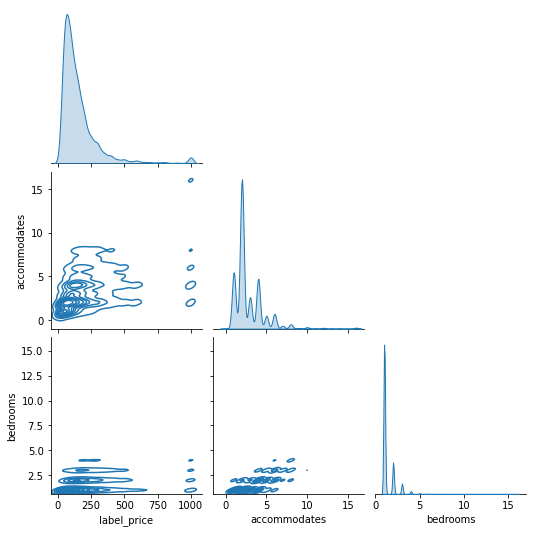

In [49]:
sns.pairplot(df_corrs, kind='kde', corner=True)
plt.show()

## Part 5: Analysis

1. Think about the possible interpretation of the plot. Recall that the label is the listing price. <br> How would you explain the relationship between the label and the two features? Is there a slight tilt to the points cluster, as the price goes up?<br>
2. Are the top two correlated features strongly or weakly correlated with the label? Are they features that should be used for our predictive machine learning problem?
3. Inspect your data matrix. It has a few features that contain unstructured text, meaning text data that is neither numerical nor categorical. List some features that contain unstructured text that you think are valuable for our predictive machine learning problem. Are there other remaining features that you think need to be prepared for the modeling phase? Do you have any suggestions on how to prepare these features?

Record your findings in the cell below.

After analyzing the pairplot, it became clear that the two features most correlated with label_price do show a visible trend as the values of these features increase, the listing price tends to rise as well. However, the relationship is not perfectly linear, the data points are spread out, suggesting only a moderate correlation. One feature displayed a tighter cluster, indicating it may have stronger predictive value. If one of the top features was number_of_reviews, we might interpret that listings with more reviews are often priced differently due to reputation effects or increased demand. The correlation scores were moderate, which means these features are useful but not enough on their own for highly accurate predictions.

Looking at the features overall, I noticed some text-heavy columns like name, summary, and description that could contain useful pricing cues such as whether the listing includes words like “luxury,” “spacious,” or “private.” I also identified categorical variables like neighbourhood_group or room_type that could provide meaningful data and should be one-hot encoded if not already. To fully prepare the data for modeling, the next steps would include addressing any remaining missing data, possibly new interaction terms.